<a href="https://colab.research.google.com/github/hrushikeshsahu19/Taxi-trip-time-Prediction/blob/main/Hrushikesh_Sahu_Team_3_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from datetime import datetime
import warnings
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/NYC Taxi Data.csv')

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
dataset.shape

(1458644, 11)

it has 1458644 rows and 11 columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Threre is No null values in our dataset

In [ ]:
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


###***There are no numerical columns with missing data***
###***The passenger count varies between 1 and 9 with most people number of people being 1 or 2***
###***The trip duration varying from 1s to 1939736s or 538 hrs. There are definitely some outliers present which must be treated.***

In [ ]:
list(dataset.columns)

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

###***Name of the columns in our dataset is***
 'id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration'

In [ ]:
dataset['vendor_id'].value_counts().reset_index()

,index,vendor_id
0,2,780302
1,1,678342


In [ ]:
dataset['passenger_count'].value_counts().reset_index()

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404
6,0,60
7,7,3
8,9,1
9,8,1


In [ ]:
dataset['store_and_fwd_flag'].value_counts().reset_index()

,index,store_and_fwd_flag
0,N,1450599
1,Y,8045


#**Exploratory Data Analysis**

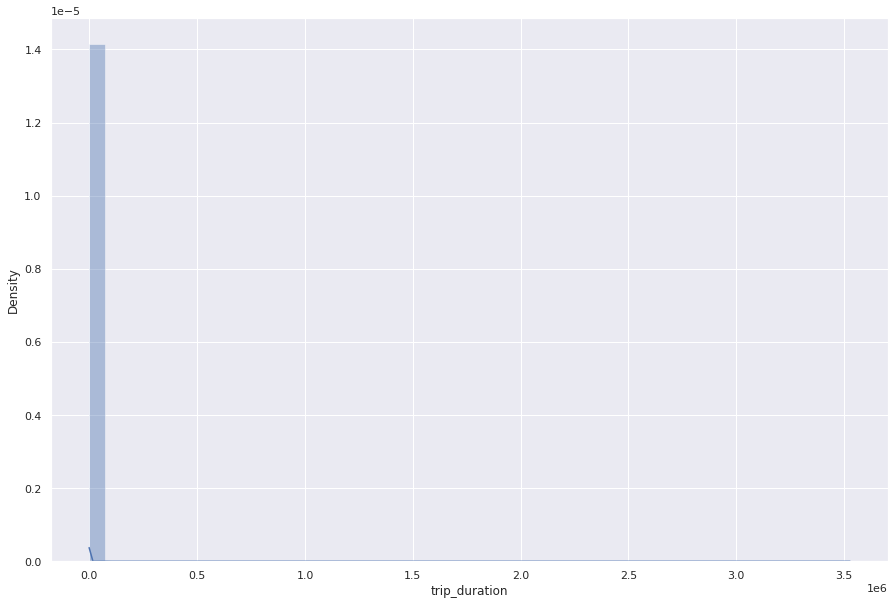

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(15,10))
sns.distplot(dataset['trip_duration'],color="B")

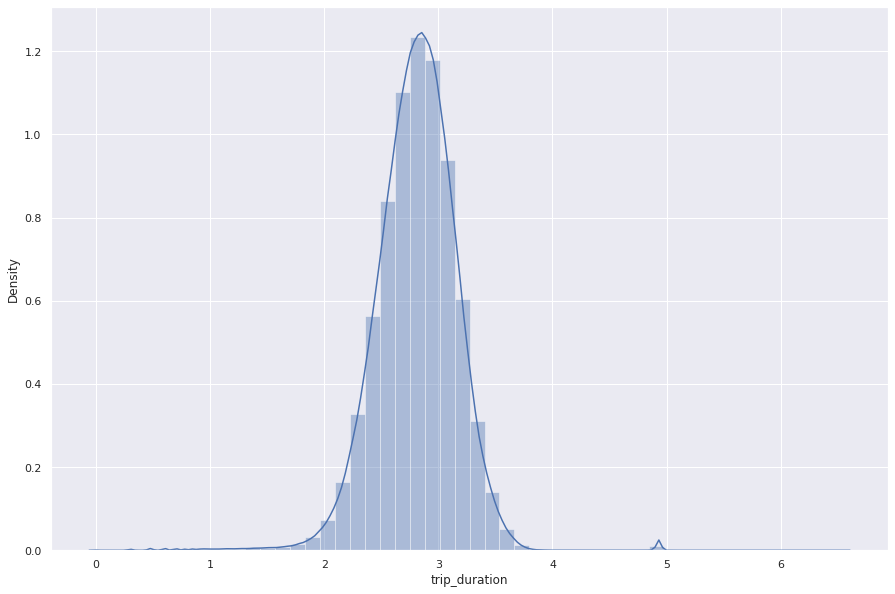

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(dataset['trip_duration']),color="B")

###take the log of trip_duration and plot the distribution   its looks like symmetric distributions

In [ ]:
passenger_count_df=dataset['passenger_count'].value_counts().reset_index()
passenger_count_df.head()

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333


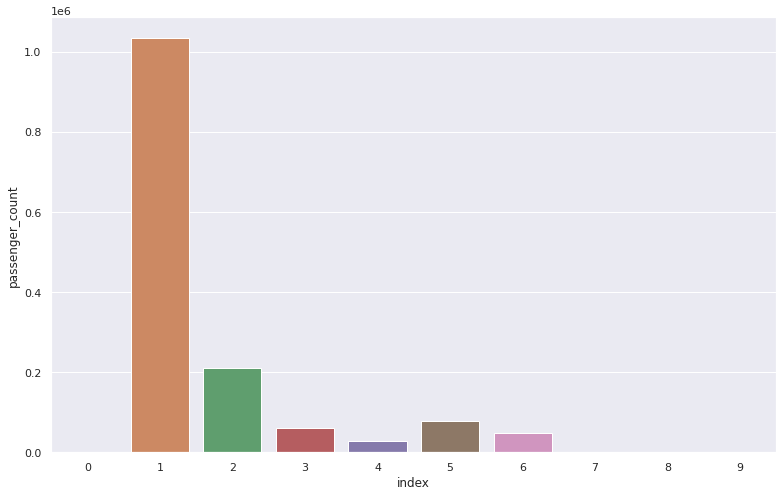

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='passenger_count',data=passenger_count_df)

In [ ]:
vendor_id_df=dataset['vendor_id'].value_counts().reset_index()
vendor_id_df

,index,vendor_id
0,2,780302
1,1,678342


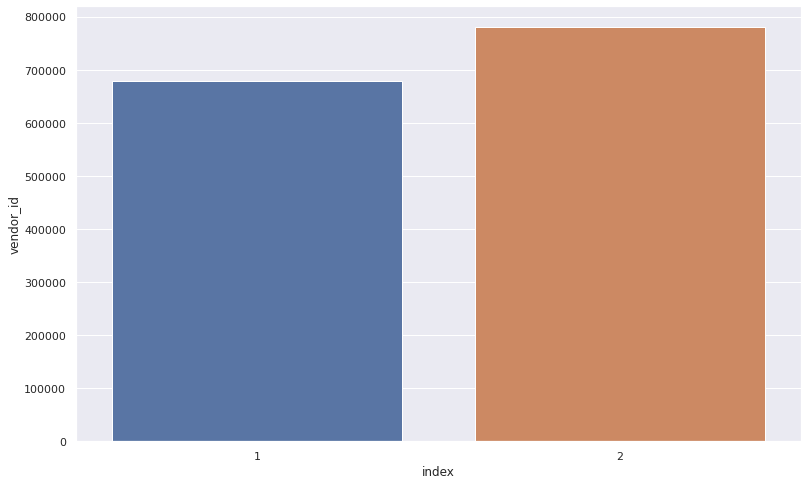

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='vendor_id',data=vendor_id_df)

In [ ]:
store_and_fwd_flag_df=dataset['store_and_fwd_flag'].value_counts().reset_index()
store_and_fwd_flag_df

,index,store_and_fwd_flag
0,N,1450599
1,Y,8045


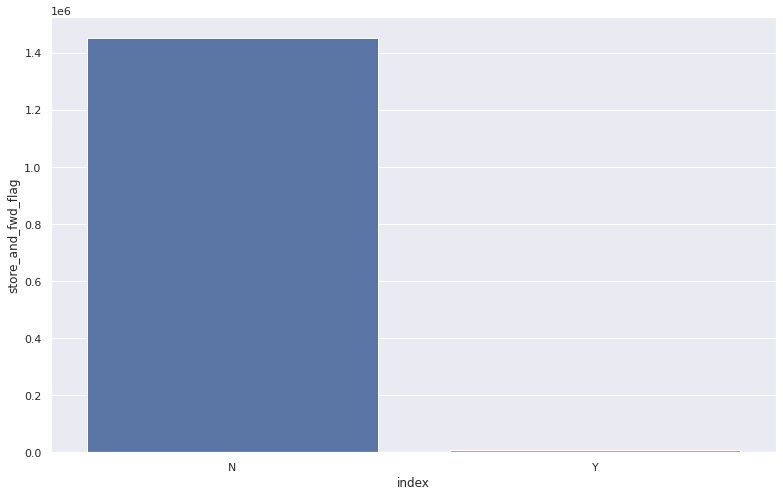

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='store_and_fwd_flag',data=store_and_fwd_flag_df)

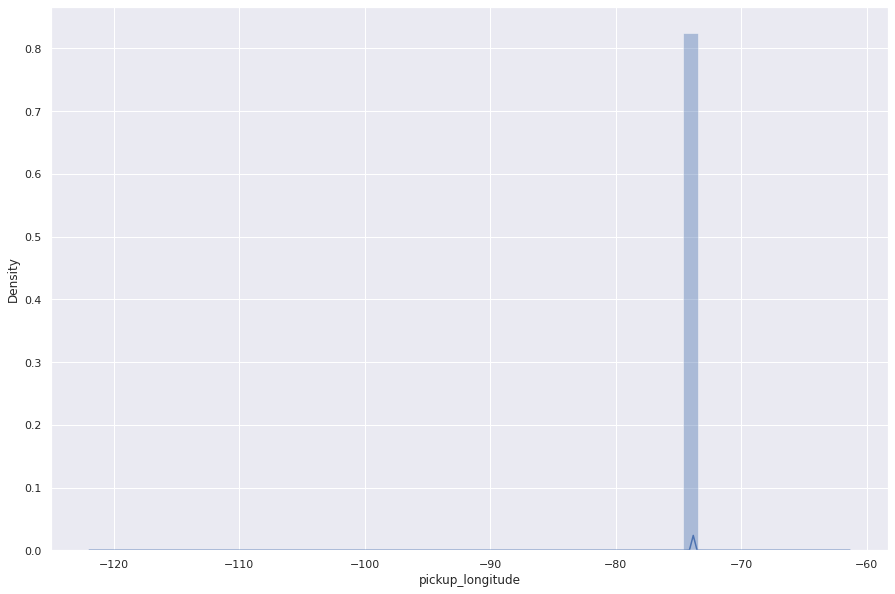

In [ ]:
# InDependent variable 'pickup_longitude'
plt.figure(figsize=(15,10))
sns.distplot(dataset['pickup_longitude'],color="B")

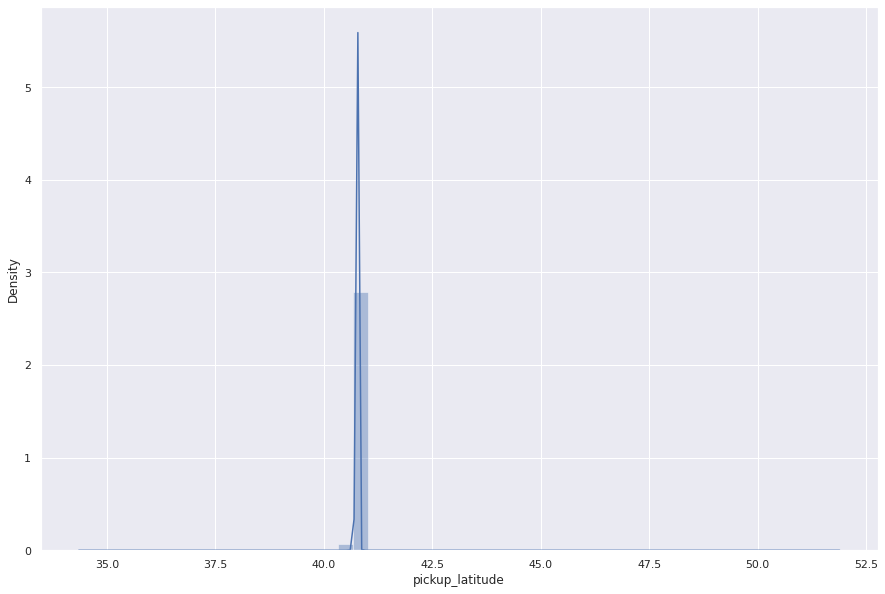

In [ ]:
# InDependent variable 'pickup_latitude'
plt.figure(figsize=(15,10))
sns.distplot(dataset['pickup_latitude'],color="B")

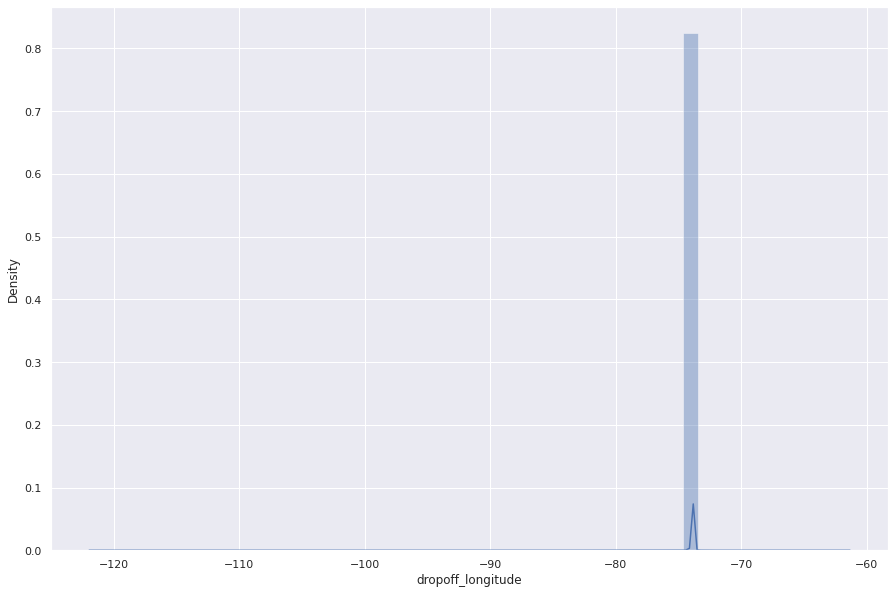

In [ ]:
# InDependent variable 'dropoff_longitude'
plt.figure(figsize=(15,10))
sns.distplot(dataset['dropoff_longitude'],color="B")

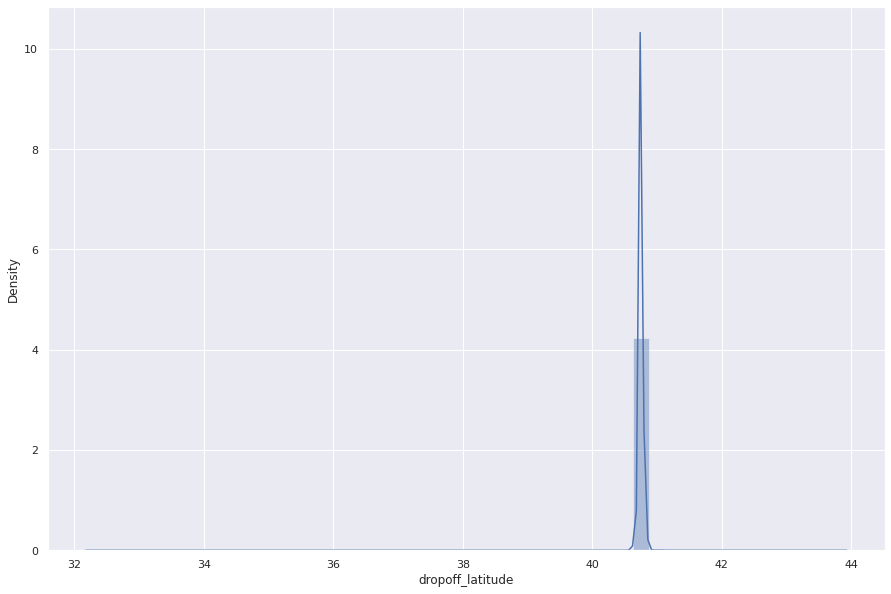

In [ ]:
# InDependent variable 'dropoff_longitude'
plt.figure(figsize=(15,10))
sns.distplot(dataset['dropoff_latitude'],color="B")

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

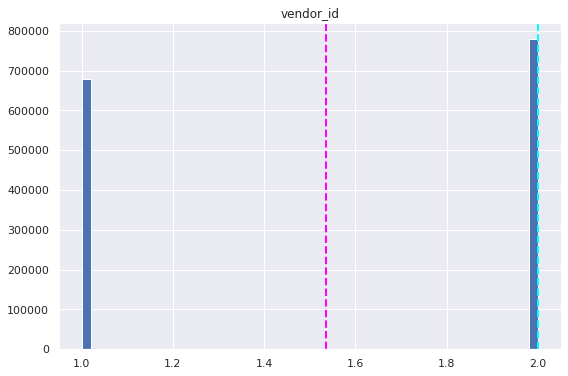

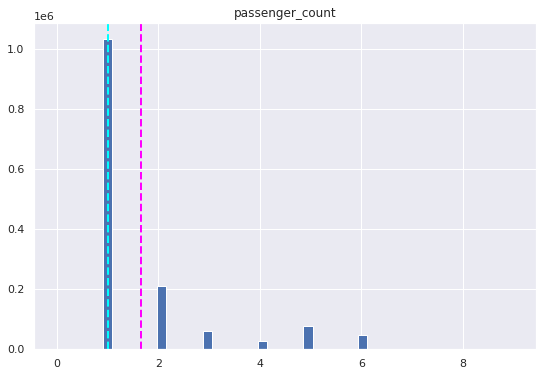

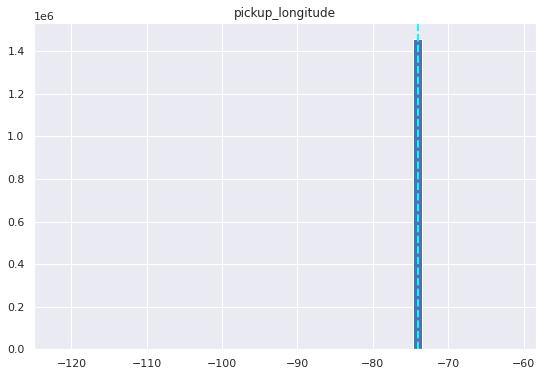

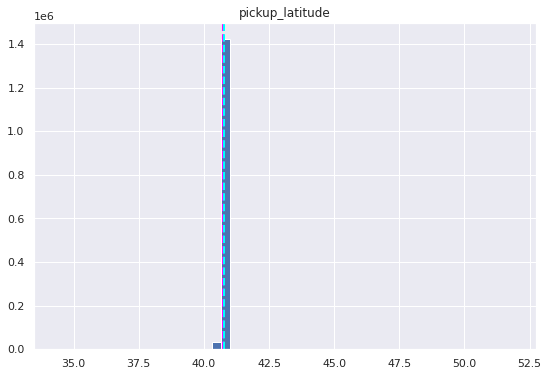

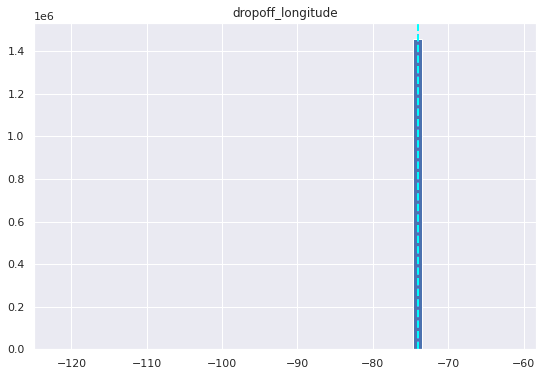

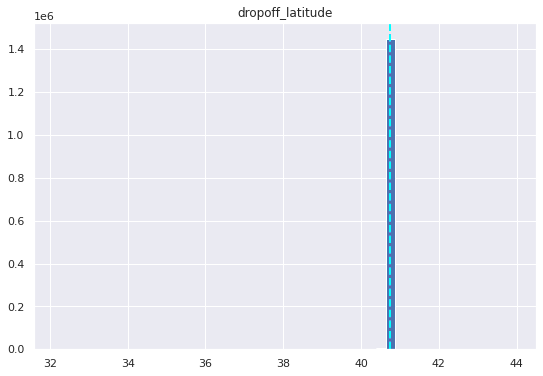

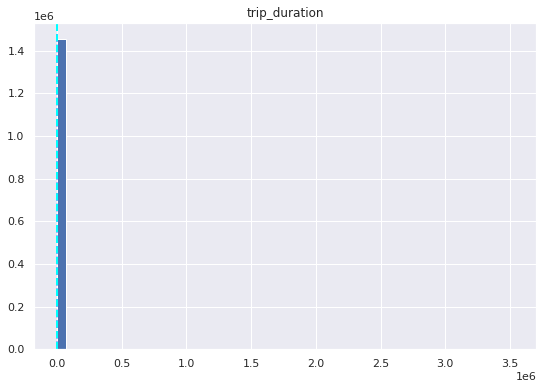

In [ ]:

# plot a bar plot for each categorical feature count (except car_ID)

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#****Transformation****
###***square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data***

###***log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data***

###***inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data***

###***Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.***

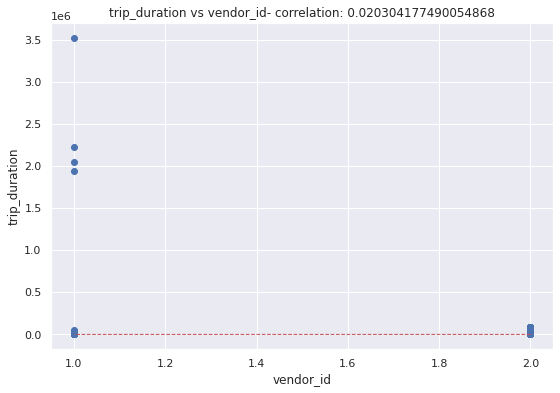

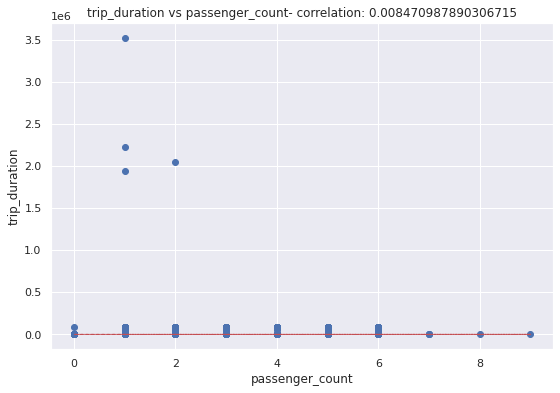

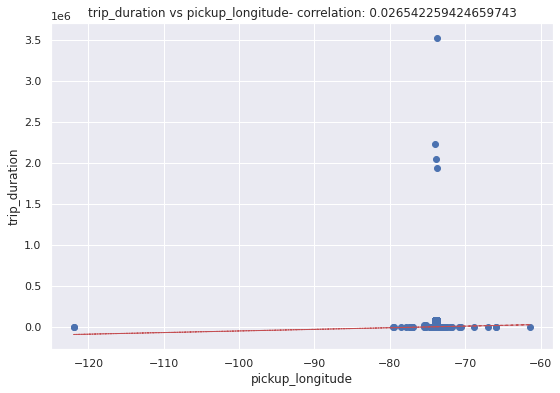

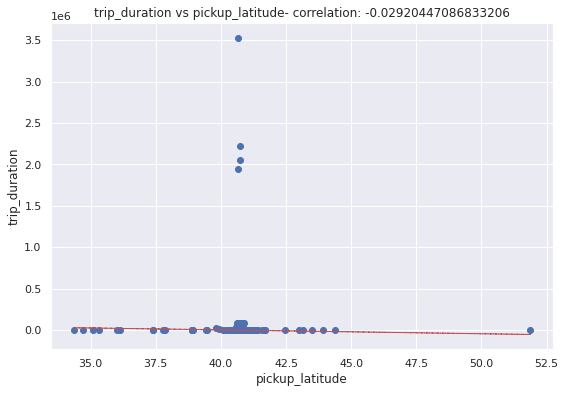

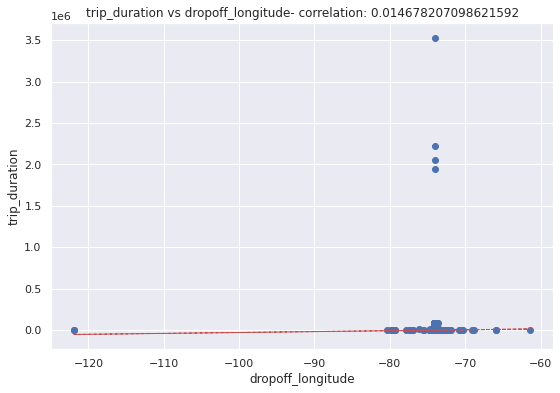

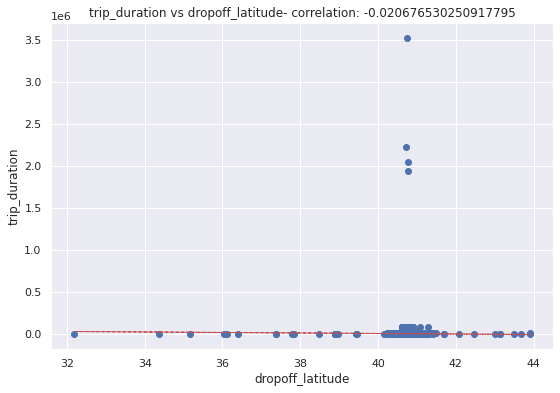

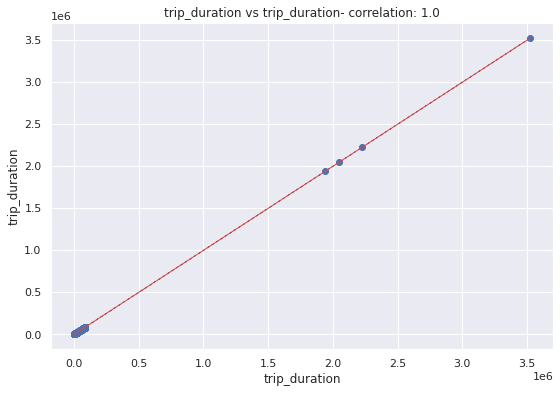

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['trip_duration'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

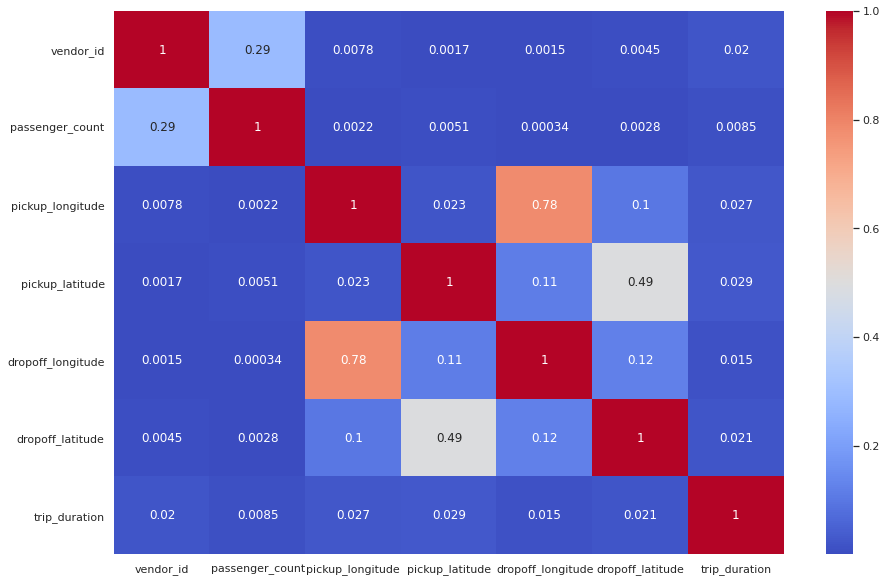

In [ ]:
## Correlation
plt.figure(figsize=(15,10))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


##***Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables (e.g., height, weight)***

##***it is 3 types***

##***1.positive correlation :A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases***

##***2.Negative correlation : Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. In statistics, a perfect negative correlation is represented by the value -1***

##***3.Zero correlation :0 indicates no correlation***

##***In statistics, a perfect positive correlation is represented by the correlation coefficient value +1.0, while 0 indicates no correlation, and -1.0 indicates a perfect inverse (negative) correlation***

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['trip_duration','pickup_longitude','dropoff_longitude']]])

,variables,VIF
0,vendor_id,1.141365e+01
1,passenger_count,2.838587e+00
2,pickup_latitude,1.380164e+06
3,dropoff_latitude,1.380186e+06


###indepandent variable are highly correlated to each other 

In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,year,month,day,hour,minute,trip_duration_hour,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,2016,3,14,17,24,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,2016,6,12,0,43,0.184167,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,2016,1,19,11,35,0.590000,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,2016,4,6,19,32,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,2016,3,26,13,30,0.120833,9.839682


In [ ]:
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

##***above function  help us to find the distance between (pickup_longitude,pickup_latitude) and (dropoff_longitude,dropoff_latitude)***

In [ ]:
dataset["distance"] = dataset.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

###***created a new features distance from existing features***

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962


In [ ]:
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.441944e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.297887e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.232223e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.094374e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.876554e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.241298e+03


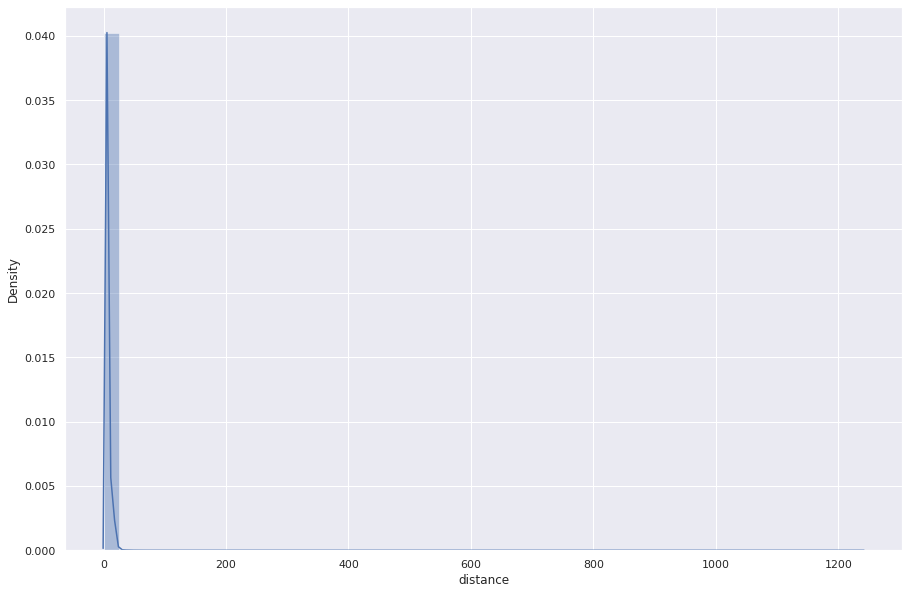

In [ ]:
# InDependent variable 'distance'
plt.figure(figsize=(15,10))
sns.distplot(dataset['distance'],color="B")

##***plot the distribution of 'distance' and it looks like postively skew***

###***This graph looks likes positive skew distribution because most of values are lies in left part of our graph***

###***positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode***

###***negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode***

In [ ]:
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in dataset.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)


display(mapa)


In [ ]:
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in dataset[dataset["distance"]>20].sample(200).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)


display(mapa)

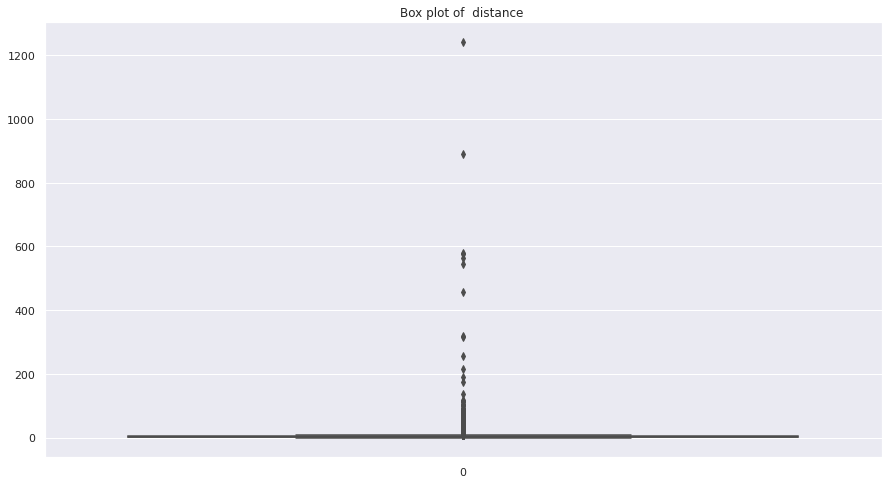

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=dataset['distance'], orient="v")

###**plot the box plot of features distance  for outlier**

#**IQR=Q3-Q1**

#**lower_limit_outlier=Q1-1.5*IQR**

#**upper_limit_outlier=Q3+1.5*IQR**

##**so we have to take the values which is greater then lower limit outlier and less then upper limit outlier**

#**remove the outlier present in distance**

In [ ]:
percentile_q1 = np.percentile(dataset['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(dataset['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(dataset['distance'],75)
print(percentile_q3)

1.23222326737417
2.0943743977620386
3.8765539736919856


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.734272792102554
Upper limit for outlier  : 7.843050033168709


In [ ]:
dataset=dataset[dataset['distance']>0]
dataset=dataset[dataset['distance']<upper_limit_outlier]

In [ ]:
dataset.shape

(1312074, 12)

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962


In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,Day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday


In [ ]:
dataset["pickup_datetime"] = pd.to_datetime(dataset["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
dataset['Day']=dataset['pickup_datetime'].dt.day_name()

In [ ]:
dataset["year"] = dataset["pickup_datetime"].apply(lambda x: x.year)
dataset["month"] = dataset["pickup_datetime"].apply(lambda x: x.month)
dataset["day_num"] = dataset["pickup_datetime"].apply(lambda x: x.day)
dataset["hour"] = dataset["pickup_datetime"].apply(lambda x: x.hour)
dataset["minute"] = dataset["pickup_datetime"].apply(lambda x: x.minute)

##**create some new features  year,month,day,hour,minitue from pickup_datetime**

In [ ]:
dataset['trip_duration_hour']=dataset['trip_duration']/3600 
dataset['speed']=dataset['distance']/dataset['trip_duration_hour']

##***create some new features trip_duration_hour from trip_duration and  speed from distance and time***

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,Day,year,month,day_num,hour,minute,trip_duration_hour,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday,2016,3,14,17,24,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday,2016,6,12,0,43,0.184167,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,Tuesday,2016,1,19,11,35,0.590000,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday,2016,4,6,19,32,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday,2016,3,26,13,30,0.120833,9.839682


In [ ]:
dataset['month'].unique()

array([3, 6, 1, 4, 5, 2])

##***unique month of our dataset are [3, 6, 1, 4, 5, 2]***

In [ ]:
dataset['year'].unique()

array([2016])

##**unique year of our dataset is 2016**

In [ ]:
dataset['day'].unique()

array([14, 12, 19,  6, 26, 30, 17, 21, 27, 10, 15,  1, 16, 11,  5, 28,  9,
       25, 20, 13, 23,  3, 18,  7,  2, 22, 29, 24,  4, 31,  8])

##***unique date of our dataset are [14, 12, 19,  6, 26, 30, 17, 21, 27, 10, 15,  1, 16, 11,  5, 28,  9, 25, 20, 13, 23,  3, 18,  7,  2, 22, 29, 24,  4, 31,  8]***

In [ ]:
dataset['hour'].unique()

array([17,  0, 11, 19, 13, 22,  7, 23, 21,  9, 20, 15,  8,  2, 12,  3, 10,
       14, 16,  1, 18,  6,  5,  4])

##***unique month of our dataset are [17,  0, 11, 19, 13, 22,  7, 23, 21,  9, 20, 15,  8,  2, 12,  3, 10,   14, 16,  1, 18,  6,  5,  4]***

In [ ]:
dataset['minute'].unique()

array([24, 43, 35, 32, 30,  1, 34, 54, 12, 45,  8, 16, 52, 58, 29, 48, 55,
       47, 23, 36, 27, 56,  7, 57,  3, 11,  0, 26, 14, 28,  5, 41, 59, 37,
       50, 18, 25,  4, 46, 38, 22, 13, 20, 17, 21, 40,  9, 10, 31, 39, 15,
       49, 51, 19,  6, 44, 53, 42,  2, 33])

In [ ]:
day_df=dataset.groupby('Day')['id'].count().reset_index()
day_df

,Day,id
0,Friday,202288
1,Monday,167077
2,Saturday,203303
3,Sunday,173911
4,Thursday,197039
5,Tuesday,183695
6,Wednesday,190658


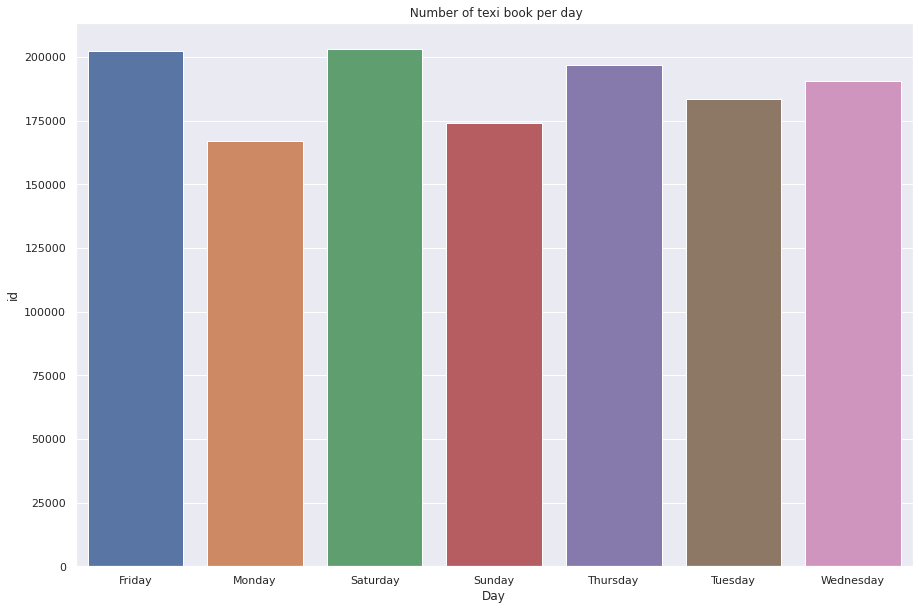

In [ ]:
plt.figure(figsize=(15,10))
plt.title(' Number of texi book per day')
sns.barplot(x='Day',y='id',data=day_df)

In [ ]:
month_df=dataset.groupby('month')['id'].count().reset_index()
month_df

,month,id
0,1,208427
1,2,216839
2,3,231647
3,4,227634
4,5,222804
5,6,210620


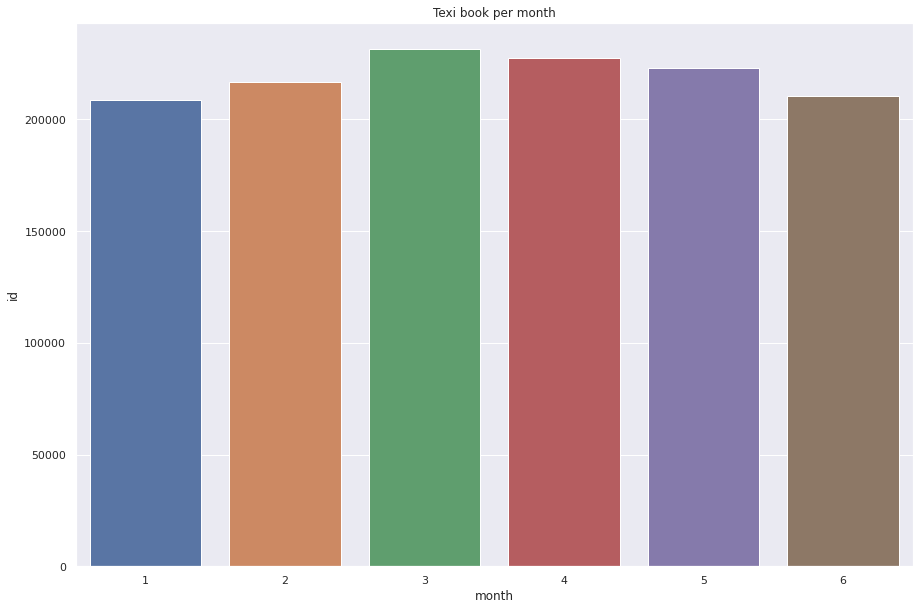

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Texi book per month')
sns.barplot(x='month',y='id',data=month_df)

In [ ]:
day_df=dataset.groupby('day_num')['id'].count().reset_index()
day_df

,day_num,id
0,1,41930
1,2,43343
2,3,43307
3,4,44985
4,5,45580
5,6,44930
6,7,44153
7,8,43626
8,9,45137
9,10,43984


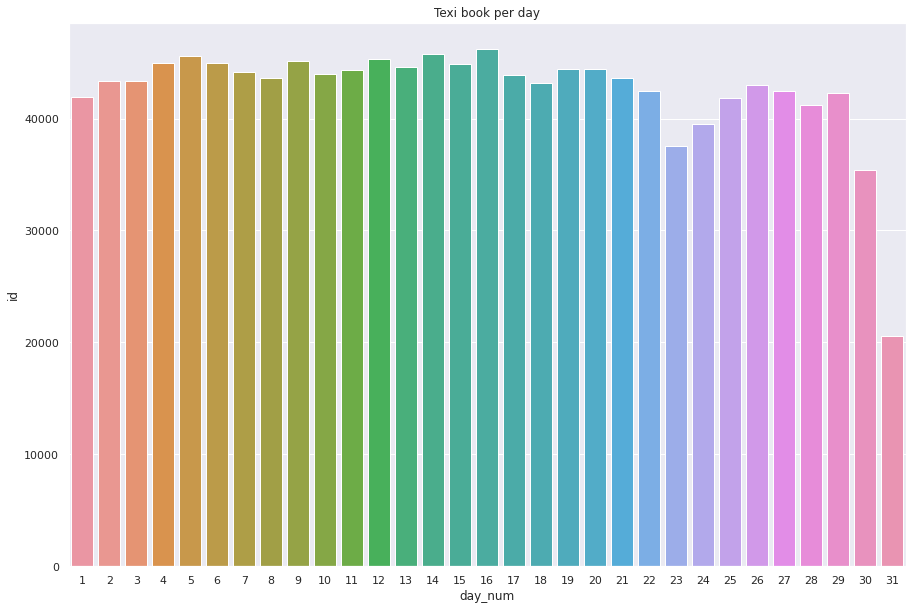

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Texi book per day')
sns.barplot(x='day_num',y='id',data=day_df)

In [ ]:
hour_df=dataset.groupby('hour')['id'].count().reset_index()
hour_df

,hour,id
0,0,46741
1,1,33908
2,2,24699
3,3,18030
4,4,12622
5,5,11553
6,6,28712
7,7,50581
8,8,62104
9,9,62873


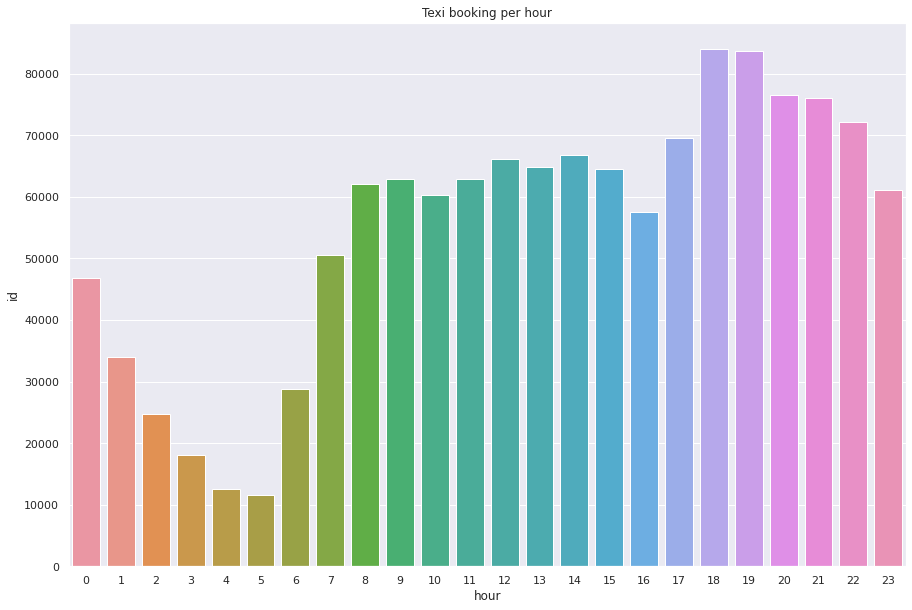

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Texi booking per hour')
sns.barplot(x='hour',y='id',data=hour_df)

In [ ]:
minute_df=dataset.groupby('minute')['id'].count().reset_index()
minute_df

,minute,id
0,0,21447
1,1,21462
2,2,21674
3,3,21759
4,4,21574
5,5,21688
6,6,22084
7,7,21513
8,8,21980
9,9,21993


In [ ]:
minute_df.sort_values(by=['id'], inplace=True,ascending=False)

In [ ]:
minute_df

,minute,id
48,48,22979
50,50,22729
45,45,22725
52,52,22577
42,42,22509
46,46,22493
49,49,22486
54,54,22446
47,47,22394
44,44,22289


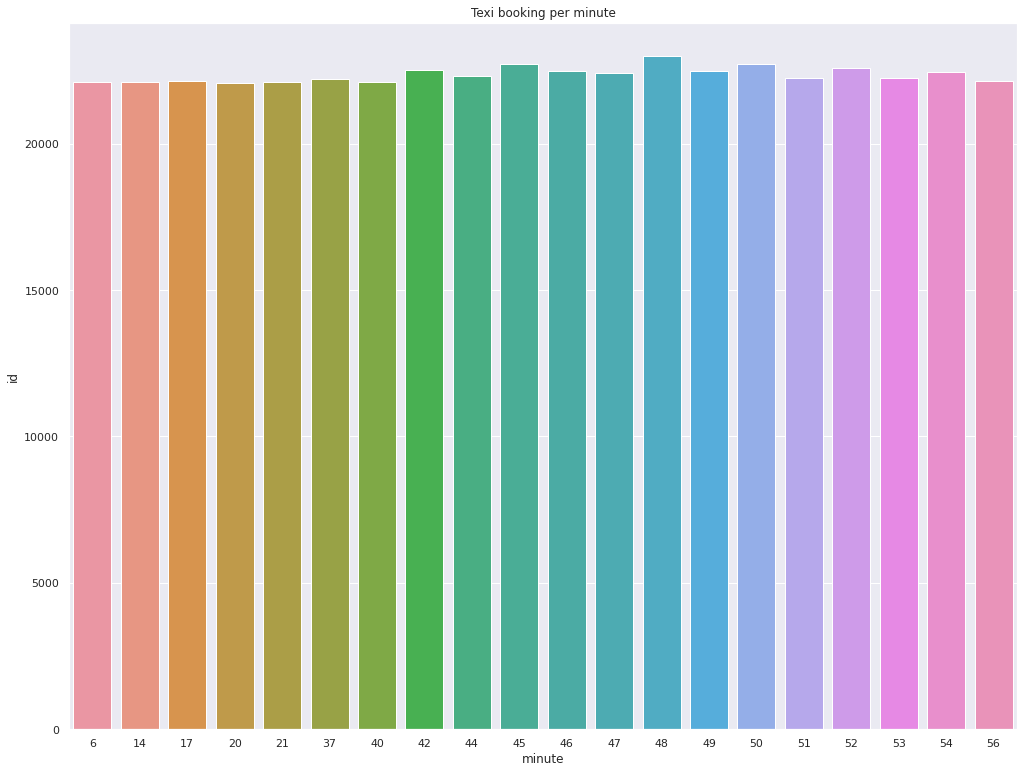

In [ ]:
plt.figure(figsize=(17,13))
plt.title('Texi booking per minute')
sns.barplot(x='minute',y='id',data=minute_df[:20])

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,Day,year,month,day_num,hour,minute,trip_duration_hour,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday,2016,3,14,17,24,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday,2016,6,12,0,43,0.184167,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,Tuesday,2016,1,19,11,35,0.590000,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday,2016,4,6,19,32,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday,2016,3,26,13,30,0.120833,9.839682


In [ ]:
dataset_pr = dataset.copy()

In [ ]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [ ]:
dataset_pr.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,year,month,day_num,hour,minute,trip_duration_hour,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498991,2016,3,14,17,24,0.126389,11.860150,1,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.806074,2016,6,12,0,43,0.184167,9.806736,1,0,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.387103,2016,1,19,11,35,0.590000,10.825598,1,0,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485965,2016,4,6,19,32,0.119167,12.469634,1,0,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188962,2016,3,26,13,30,0.120833,9.839682,1,0,0,0,1,0,0,0,0


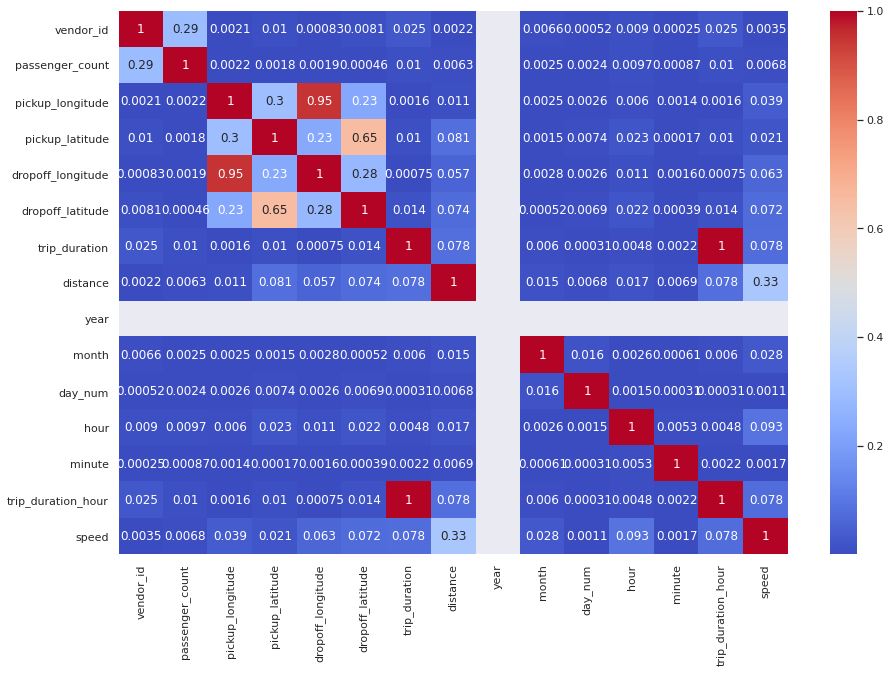

In [ ]:
## Correlation
plt.figure(figsize=(15,10))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
 dataset_pr.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/my_Texi_csv.csv')

In [ ]:
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'speed','store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']

In [ ]:
dataset_pr.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,year,month,day_num,hour,minute,trip_duration_hour,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,455,1.498991,2016,3,14,17,24,0.126389,11.86015,1,0,0,1,0,0,0,0,0


In [ ]:
X=dataset_pr[features][:10000]
y=dataset_pr['trip_duration_hour'][:10000]

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
scalar= MinMaxScaler(feature_range=(0, 1))
scalar.fit(X_train)
scalar.fit_transform(X_train)
scalar.fit_transform(X_test)

array([[0.        , 0.        , 0.07778483, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.97889559, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.1076801 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.10517296, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.4       , 0.08768645, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.6       , 0.17438908, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.01 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.012069010564336069

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [ ]:
best_xgb_model.fit(X_train,y_train)

[19:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [ ]:
y_pred_l=best_xgb_model.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.014195445790970674
RMSE : 0.1191446423091306
R2 : 0.9748250921967403
Adjusted R2 :  0.974570671703529
